In [1]:
setwd("C:/Users/bishw/Dropbox/IVY DATA SCIENCE/R/Class 11")
df=read.csv('Social_Network_Ads.csv', na.strings = "")
head(df)
df$User.ID<-NULL

User.ID,Gender,Age,EstimatedSalary,Purchased
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
15728773,Male,27,58000,0


In [9]:
head(df)
summary(df)
str(df)
df$Purchased<-as.factor(df$Purchased)

Gender,Age,EstimatedSalary,Purchased
Male,19,19000,0
Male,35,20000,0
Female,26,43000,0
Female,27,57000,0
Male,19,76000,0
Male,27,58000,0


    Gender         Age        EstimatedSalary  Purchased
 Female:204   Min.   :18.00   Min.   : 15000   0:257    
 Male  :196   1st Qu.:29.75   1st Qu.: 43000   1:143    
              Median :37.00   Median : 70000            
              Mean   :37.66   Mean   : 69743            
              3rd Qu.:46.00   3rd Qu.: 88000            
              Max.   :60.00   Max.   :150000            

'data.frame':	400 obs. of  4 variables:
 $ Gender         : Factor w/ 2 levels "Female","Male": 2 2 1 1 2 2 1 1 2 1 ...
 $ Age            : int  19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: int  19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ Purchased      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...


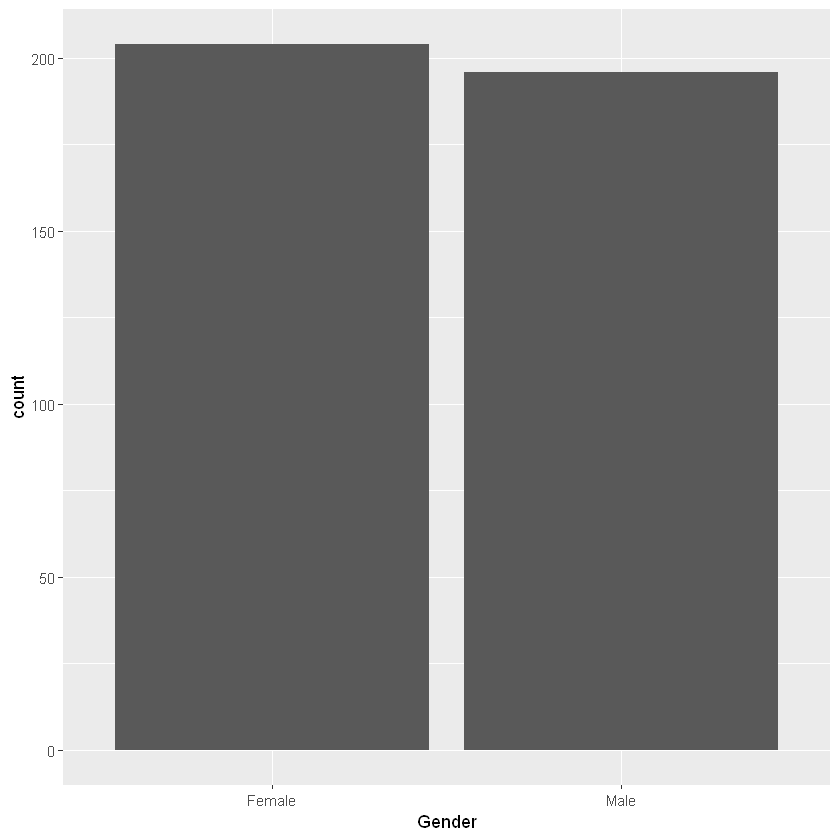

In [3]:
library(ggplot2)
g<-ggplot(data = df)
g+geom_bar(aes(x=Gender))

Warning message:
"Removed 2 rows containing missing values (geom_bar)."

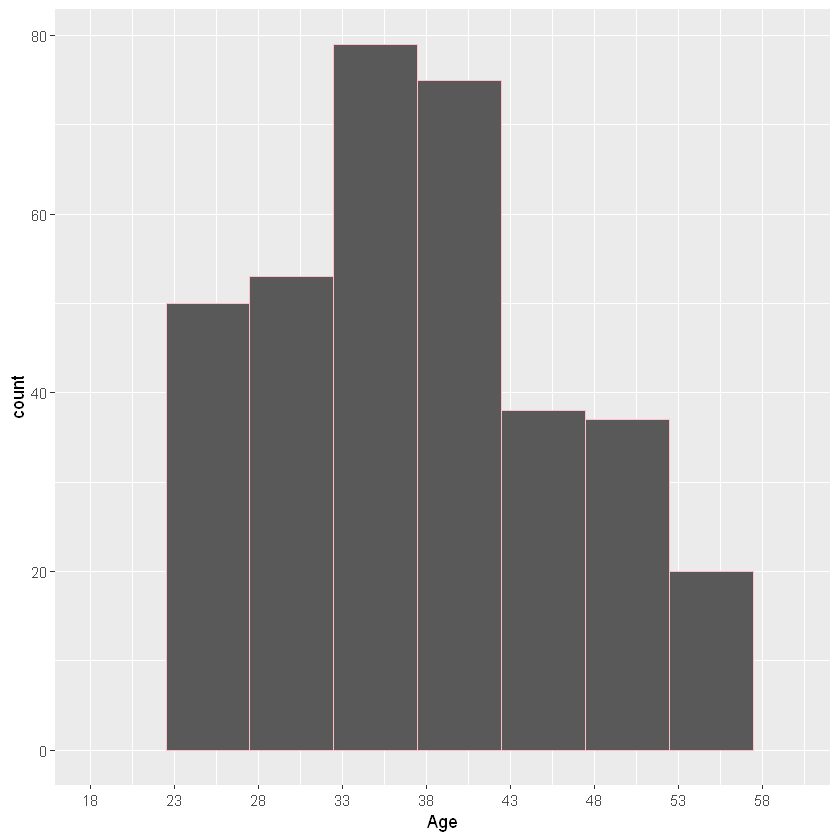

In [4]:
g+geom_histogram(aes(x=Age), binwidth = 5, color='pink')+scale_x_continuous(limits = c(18,60), breaks = seq(18,60,5))

Warning message:
"Removed 1 rows containing missing values (geom_bar)."

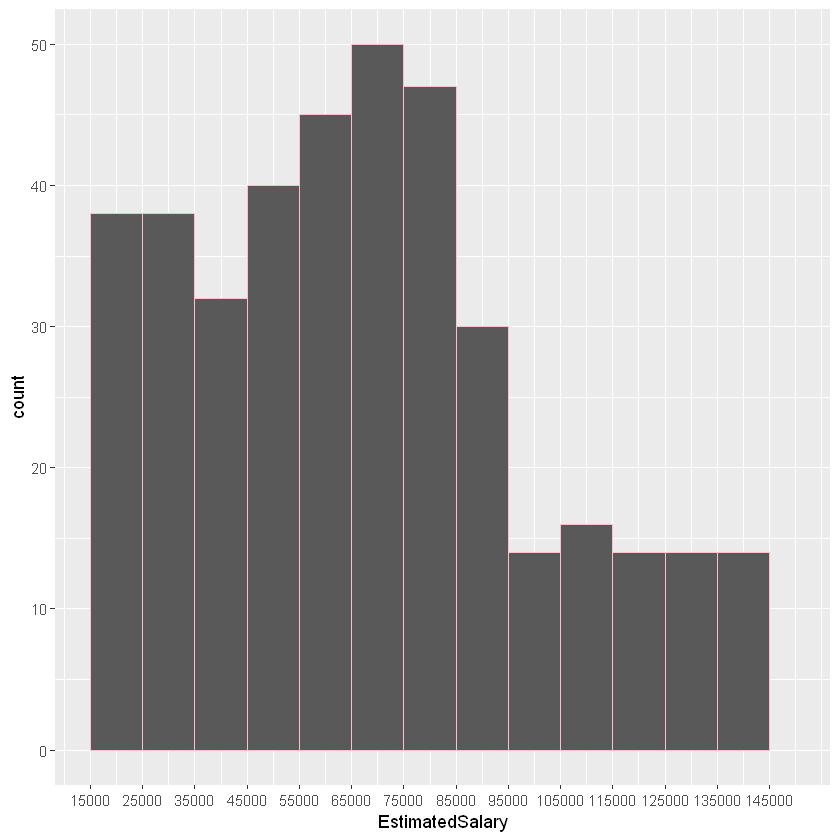

In [5]:
g+geom_histogram(aes(x=EstimatedSalary), binwidth = 10000, color='pink')+scale_x_continuous(limits = c(15000,150000), breaks = seq(15000,150000,10000))

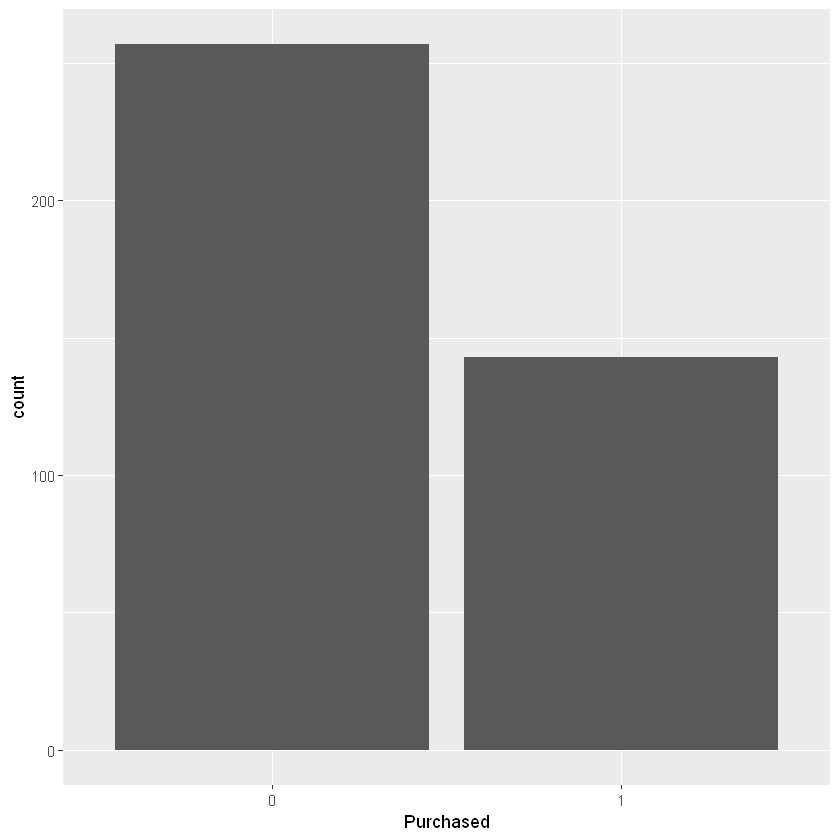

In [6]:
g+geom_bar(aes(x=Purchased))

In [7]:
library(caTools)

In [11]:
set.seed(1429)
split<-sample.split(Y = df$Purchased, SplitRatio = 0.7)
train<-subset(x = df, subset = split==T)
test<-subset(x=df, subset = split==F)

In [14]:
head(train)
head(test)

,Gender,Age,EstimatedSalary,Purchased
2,Male,35,20000,0
4,Female,27,57000,0
5,Male,19,76000,0
6,Male,27,58000,0
7,Female,27,84000,0
8,Female,32,150000,1


,Gender,Age,EstimatedSalary,Purchased
1,Male,19,19000,0
3,Female,26,43000,0
12,Female,26,52000,0
17,Male,47,25000,1
19,Male,46,28000,1
25,Male,46,23000,1


In [15]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



In [19]:
rf<-randomForest(formula = Purchased ~ . , data = train, ntree=500, mtry = sqrt(ncol(df)-1), importance = T, proximity = T)

In [20]:
print(rf)


Call:
 randomForest(formula = Purchased ~ ., data = train, ntree = 500,      mtry = sqrt(ncol(df) - 1), importance = T, proximity = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 10%
Confusion matrix:
    0  1 class.error
0 163 17  0.09444444
1  11 89  0.11000000


In [25]:
library(caret)
prd1<-predict(rf, test)
confusionMatrix(prd1, test$Purchased)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 68  5
         1  9 38
                                         
               Accuracy : 0.8833         
                 95% CI : (0.812, 0.9347)
    No Information Rate : 0.6417         
    P-Value [Acc > NIR] : 1.877e-09      
                                         
                  Kappa : 0.7514         
                                         
 Mcnemar's Test P-Value : 0.4227         
                                         
            Sensitivity : 0.8831         
            Specificity : 0.8837         
         Pos Pred Value : 0.9315         
         Neg Pred Value : 0.8085         
             Prevalence : 0.6417         
         Detection Rate : 0.5667         
   Detection Prevalence : 0.6083         
      Balanced Accuracy : 0.8834         
                                         
       'Positive' Class : 0              
                                         

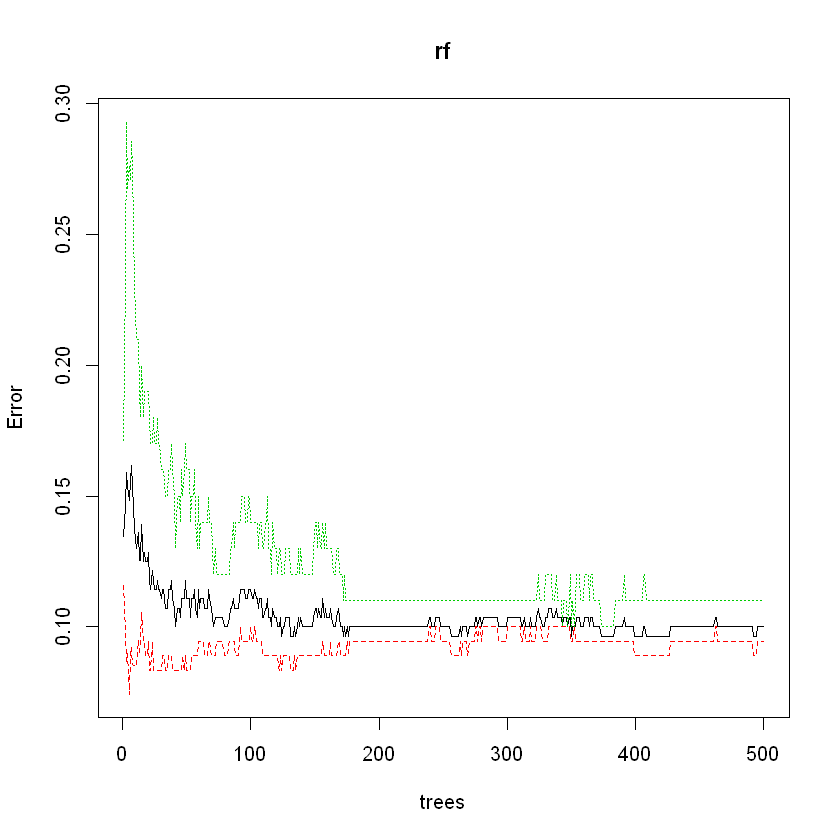

In [26]:
plot(rf)

mtry = 1  OOB error = 50.36% 
Searching left ...
mtry = 2 	OOB error = 53.21% 
-0.05673759 0.5 
Searching right ...


Warning message in randomForest.default(x, y, mtry = mtryCur, ntree = ntreeTry, :
"invalid mtry: reset to within valid range"

mtry = 0 	OOB error = 50.36% 
0 0.5 


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"

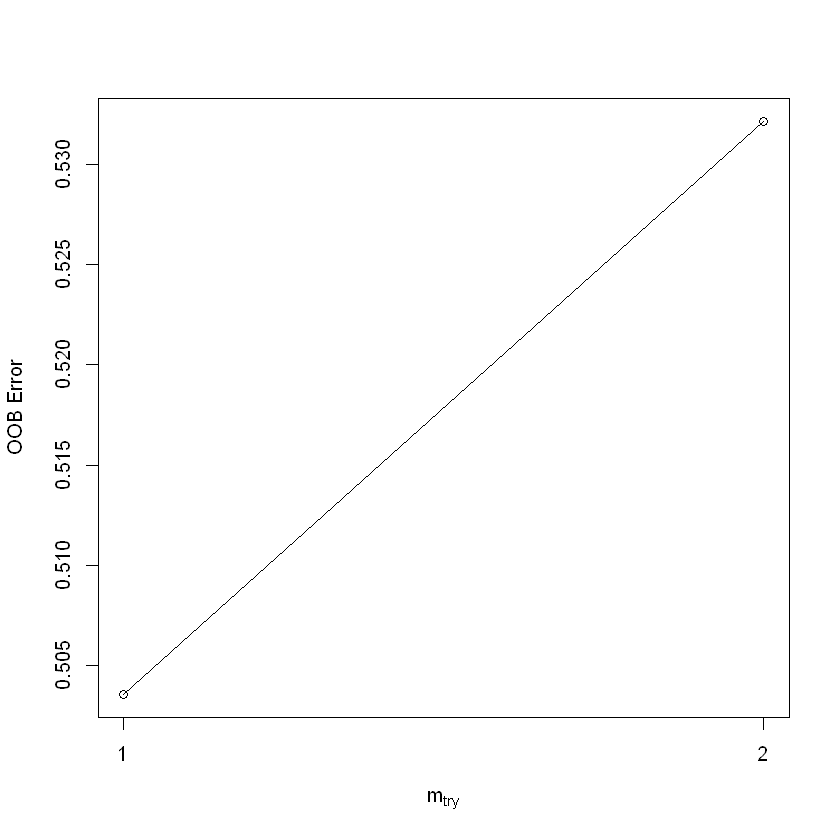

In [27]:
t<-tuneRF(train[,-1], train[,1], ntreeTry = 500, stepFactor = 0.5, improve = 0.5, trace = T, plot = T)

In [33]:
rfi<-randomForest(formula = Purchased ~ . , data = train, ntree=500, mtry = 1, importance = T, proximity = T)

In [34]:
print(rf)


Call:
 randomForest(formula = Purchased ~ ., data = train, ntree = 500,      mtry = sqrt(ncol(df) - 1), importance = T, proximity = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 10%
Confusion matrix:
    0  1 class.error
0 163 17  0.09444444
1  11 89  0.11000000


In [35]:
pred2<-predict(rf, test)
confusionMatrix(pred2, test$Purchased)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 68  5
         1  9 38
                                         
               Accuracy : 0.8833         
                 95% CI : (0.812, 0.9347)
    No Information Rate : 0.6417         
    P-Value [Acc > NIR] : 1.877e-09      
                                         
                  Kappa : 0.7514         
                                         
 Mcnemar's Test P-Value : 0.4227         
                                         
            Sensitivity : 0.8831         
            Specificity : 0.8837         
         Pos Pred Value : 0.9315         
         Neg Pred Value : 0.8085         
             Prevalence : 0.6417         
         Detection Rate : 0.5667         
   Detection Prevalence : 0.6083         
      Balanced Accuracy : 0.8834         
                                         
       'Positive' Class : 0              
                                         

Random Forest 

280 samples
  3 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 252, 252, 252, 252, 252, 252, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  1     0.8845238  0.7455291
  2     0.8916667  0.7690015
  3     0.8880952  0.7613568

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


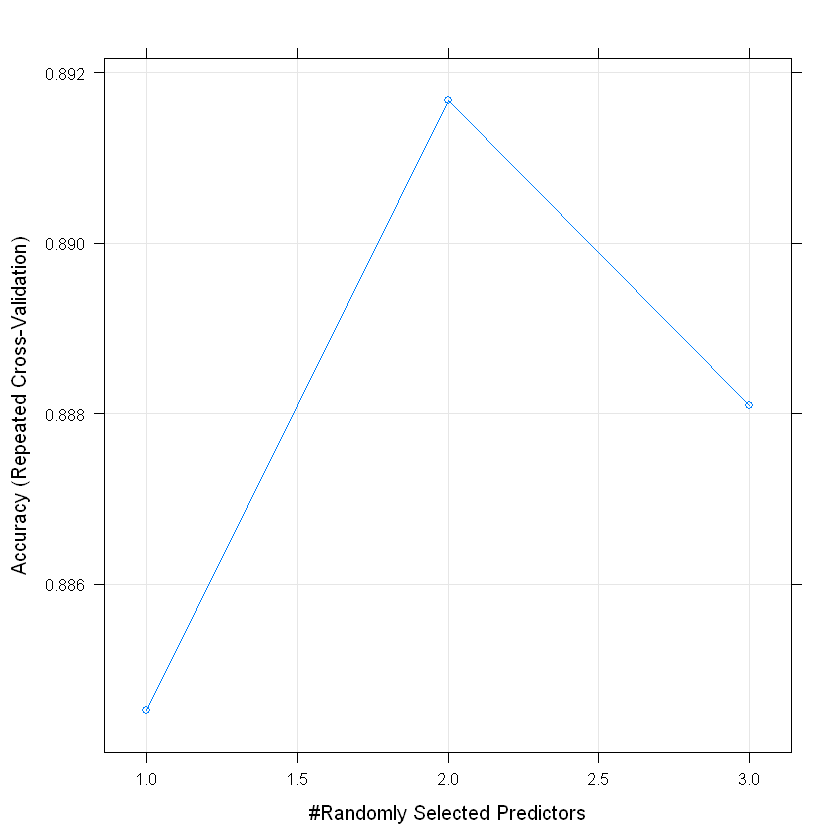

In [39]:
# Random Search
control <- trainControl(method="repeatedcv", number=10, repeats=3, search="random")
set.seed(1429)
mtry <- sqrt(ncol(train))
rf_random <- train(Purchased~., data=train, method="rf", metric="Accuracy", tuneLength=15, trControl=control)
print(rf_random)
plot(rf_random)

In [60]:
rfi<-randomForest(formula = Purchased ~ . , data = train, ntree=500, mtry = 2, importance = T, proximity = T)
print(rf)
pred2<-predict(rf, test)
confusionMatrix(pred2, test$Purchased, positive = '1')


Call:
 randomForest(formula = Purchased ~ ., data = train, ntree = 500,      mtry = sqrt(ncol(df) - 1), importance = T, proximity = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 10%
Confusion matrix:
    0  1 class.error
0 163 17  0.09444444
1  11 89  0.11000000


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 68  5
         1  9 38
                                         
               Accuracy : 0.8833         
                 95% CI : (0.812, 0.9347)
    No Information Rate : 0.6417         
    P-Value [Acc > NIR] : 1.877e-09      
                                         
                  Kappa : 0.7514         
                                         
 Mcnemar's Test P-Value : 0.4227         
                                         
            Sensitivity : 0.8837         
            Specificity : 0.8831         
         Pos Pred Value : 0.8085         
         Neg Pred Value : 0.9315         
             Prevalence : 0.3583         
         Detection Rate : 0.3167         
   Detection Prevalence : 0.3917         
      Balanced Accuracy : 0.8834         
                                         
       'Positive' Class : 1              
                                         

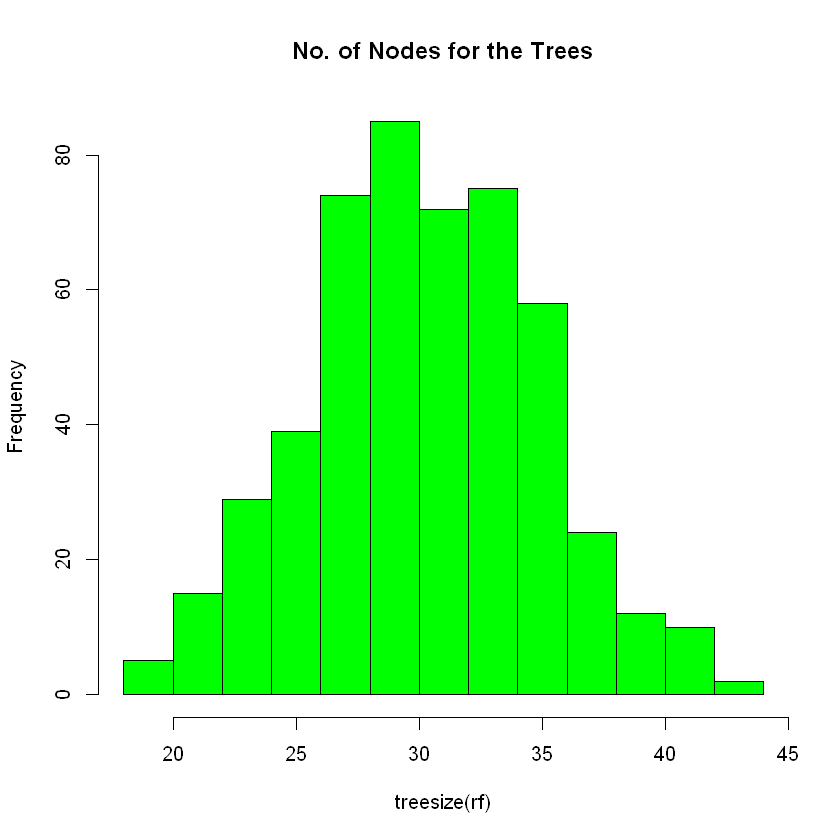

In [41]:
hist(treesize(rf),
     main = "No. of Nodes for the Trees",
     col = "green")

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
Gender,-0.3496448,-2.881516,-2.637201,2.965405
Age,67.4864003,58.547615,81.049717,70.268308
EstimatedSalary,48.6294763,39.862333,58.317641,53.467698


[1] 1366 6233 7251

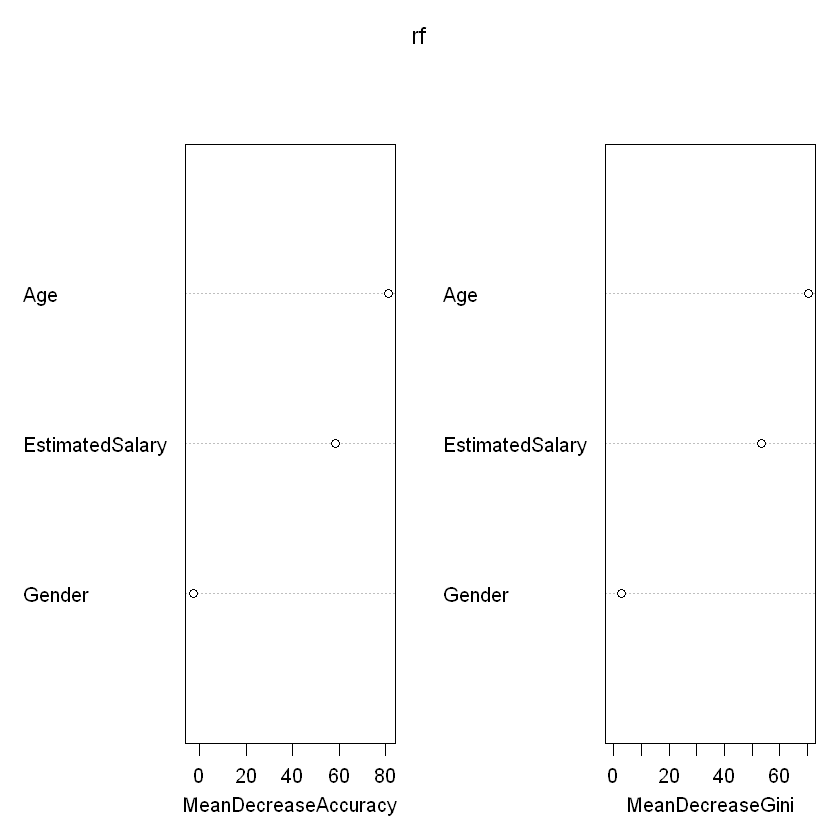

In [46]:
varImpPlot(rf,
           sort = T)
           #n.var = 10,
           #main = "Top 10 - Variable Importance")
importance(rf)
varUsed(rf)

In [49]:
getTree(rf, 1, labelVar = TRUE)


left daughter,right daughter,split var,split point,status,prediction
2,3,Age,41.5,1,NA
4,5,EstimatedSalary,92500.0,1,NA
6,7,EstimatedSalary,79500.0,1,NA
8,9,EstimatedSalary,70500.0,1,NA
10,11,Age,26.5,1,NA
12,13,EstimatedSalary,56500.0,1,NA
14,15,Gender,1.0,1,NA
0,0,NA,0.0,-1,0
16,17,EstimatedSalary,79500.0,1,NA
0,0,NA,0.0,-1,0


install.packages("party")

In [54]:
library(party)

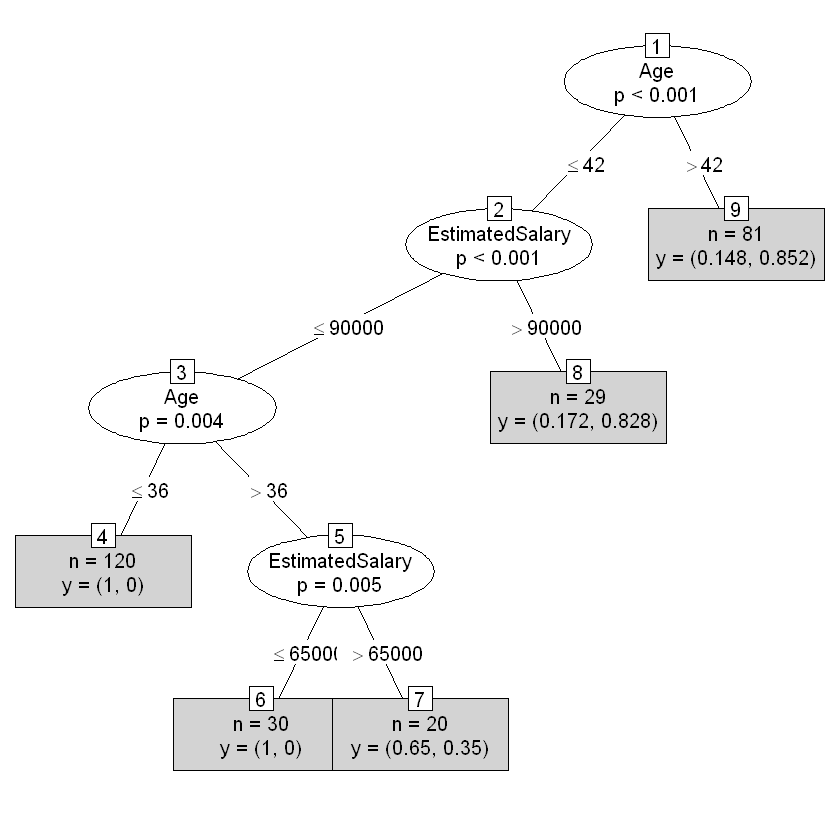

In [59]:
tr<-ctree(formula = Purchased ~ . , data = train)
plot(tr, type='simple')

In [61]:
library(ROSE)

Loaded ROSE 0.0-3



In [62]:
summary(train$Purchased)

0   1 
180 100

In [66]:
train.up<-ovun.sample(formula = Purchased ~ . , method = 'over', N = 180*2, seed = 1429, data = train)$data
train.down<-ovun.sample(formula = Purchased ~ . , method = 'under', N = 100*2, seed = 1429, data = train)$data
train.both<-ovun.sample(formula = Purchased ~ . , method = 'both', N = 280, seed = 1429, data = train)$data
train.smote<-ROSE(formula = Purchased ~ . , N = 300, seed = 1429, data = train)$data

In [67]:
rfu<-randomForest(formula = Purchased ~ . , data = train.up, ntree=500, mtry = 2, importance = T, proximity = T)
print(rfu)
predu<-predict(rfu, test)
confusionMatrix(predu, test$Purchased, positive = '1')



Call:
 randomForest(formula = Purchased ~ ., data = train.up, ntree = 500,      mtry = 2, importance = T, proximity = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 6.94%
Confusion matrix:
    0   1 class.error
0 159  21  0.11666667
1   4 176  0.02222222


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 66  5
         1 11 38
                                          
               Accuracy : 0.8667          
                 95% CI : (0.7925, 0.9218)
    No Information Rate : 0.6417          
    P-Value [Acc > NIR] : 2.852e-08       
                                          
                  Kappa : 0.7187          
                                          
 Mcnemar's Test P-Value : 0.2113          
                                          
            Sensitivity : 0.8837          
            Specificity : 0.8571          
         Pos Pred Value : 0.7755          
         Neg Pred Value : 0.9296          
             Prevalence : 0.3583          
         Detection Rate : 0.3167          
   Detection Prevalence : 0.4083          
      Balanced Accuracy : 0.8704          
                                          
       'Positive' Class : 1               
                                    

In [68]:
rfd<-randomForest(formula = Purchased ~ . , data = train.down, ntree=500, mtry = 2, importance = T, proximity = T)
print(rfd)
predd<-predict(rfd, test)
confusionMatrix(predd, test$Purchased, positive = '1')


Call:
 randomForest(formula = Purchased ~ ., data = train.down, ntree = 500,      mtry = 2, importance = T, proximity = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 12%
Confusion matrix:
   0  1 class.error
0 86 14        0.14
1 10 90        0.10


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 62  4
         1 15 39
                                          
               Accuracy : 0.8417          
                 95% CI : (0.7638, 0.9019)
    No Information Rate : 0.6417          
    P-Value [Acc > NIR] : 1.014e-06       
                                          
                  Kappa : 0.6741          
                                          
 Mcnemar's Test P-Value : 0.02178         
                                          
            Sensitivity : 0.9070          
            Specificity : 0.8052          
         Pos Pred Value : 0.7222          
         Neg Pred Value : 0.9394          
             Prevalence : 0.3583          
         Detection Rate : 0.3250          
   Detection Prevalence : 0.4500          
      Balanced Accuracy : 0.8561          
                                          
       'Positive' Class : 1               
                                    

In [69]:
rfb<-randomForest(formula = Purchased ~ . , data = train.both, ntree=500, mtry = 2, importance = T, proximity = T)
print(rfb)
predb<-predict(rfb, test)
confusionMatrix(predb, test$Purchased, positive = '1')


Call:
 randomForest(formula = Purchased ~ ., data = train.both, ntree = 500,      mtry = 2, importance = T, proximity = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4.64%
Confusion matrix:
    0   1 class.error
0 129   5  0.03731343
1   8 138  0.05479452


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 67  4
         1 10 39
                                         
               Accuracy : 0.8833         
                 95% CI : (0.812, 0.9347)
    No Information Rate : 0.6417         
    P-Value [Acc > NIR] : 1.877e-09      
                                         
                  Kappa : 0.7539         
                                         
 Mcnemar's Test P-Value : 0.1814         
                                         
            Sensitivity : 0.9070         
            Specificity : 0.8701         
         Pos Pred Value : 0.7959         
         Neg Pred Value : 0.9437         
             Prevalence : 0.3583         
         Detection Rate : 0.3250         
   Detection Prevalence : 0.4083         
      Balanced Accuracy : 0.8886         
                                         
       'Positive' Class : 1              
                                         

In [70]:
rfr<-randomForest(formula = Purchased ~ . , data = train.smote, ntree=500, mtry = 2, importance = T, proximity = T)
print(rfr)
predr<-predict(rfr, test)
confusionMatrix(predr, test$Purchased, positive = '1')


Call:
 randomForest(formula = Purchased ~ ., data = train.smote, ntree = 500,      mtry = 2, importance = T, proximity = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 14.33%
Confusion matrix:
    0   1 class.error
0 119  25   0.1736111
1  18 138   0.1153846


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 69  3
         1  8 40
                                          
               Accuracy : 0.9083          
                 95% CI : (0.8419, 0.9533)
    No Information Rate : 0.6417          
    P-Value [Acc > NIR] : 1.747e-11       
                                          
                  Kappa : 0.8057          
                                          
 Mcnemar's Test P-Value : 0.2278          
                                          
            Sensitivity : 0.9302          
            Specificity : 0.8961          
         Pos Pred Value : 0.8333          
         Neg Pred Value : 0.9583          
             Prevalence : 0.3583          
         Detection Rate : 0.3333          
   Detection Prevalence : 0.4000          
      Balanced Accuracy : 0.9132          
                                          
       'Positive' Class : 1               
                                    